In [ ]:
#importation des données /chargement du fichier
import pandas 
df = pandas.read_excel("C:/Users/HP/Desktop/Fichiers Finaux/ChangePatient.xlsx",header=0)
df

In [ ]:
# vérifions le type de Voiture
print(type(df))

In [ ]:
#dimensions : nombre de lignes, nombre de colonnes
print(df.shape)

In [ ]:
#Les noms des colonnes
print(df.columns)

In [ ]:
#Type de chaque colonne
print(df.dtypes)

In [ ]:
#Description des données
print(df.describe())

array([[<AxesSubplot:xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='JobLoss', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='CovidAfterVaccin', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='Vaccinated', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='PatientId', ylabel='Unnamed: 0'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='JobLoss'>,
        <AxesSubplot:xlabel='JobLoss', ylabel='JobLoss'>,
        <AxesSubplot:xlabel='CovidAfterVaccin', ylabel='JobLoss'>,
        <AxesSubplot:xlabel='Vaccinated', ylabel='JobLoss'>,
        <AxesSubplot:xlabel='PatientId', ylabel='JobLoss'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='CovidAfterVaccin'>,
        <AxesSubplot:xlabel='JobLoss', ylabel='CovidAfterVaccin'>,
        <AxesSubplot:xlabel='CovidAfterVaccin', ylabel='CovidAfterVaccin'>,
        <AxesSubplot:xlabel='Vaccinated', ylabel='CovidAfterVaccin'>,
        <AxesSubplot:xlabel='PatientId', ylabel='CovidAfterVaccin'>],
       [<AxesSub

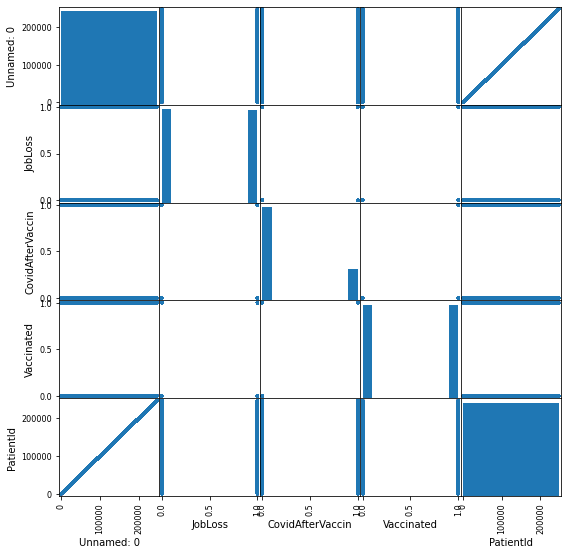

In [19]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize=(9,9))

In [31]:
del df['Unnamed: 0']

In [32]:
df

,Age Bracket,Gender,Detected State,State code,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,PatientId,Reason
0,0,0,Kerala,KL,1,0,India,0,1,1,NaN,4,0,1,1,NaN
1,0,1,Kerala,KL,1,0,India,0,1,2,NaN,3,1,1,2,NaN
2,0,1,Kerala,KL,1,0,India,0,0,1,NaN,0,0,1,3,NaN
3,0,1,Delhi,DL,1,0,India,3,1,2,NaN,5,0,0,4,4.0
4,0,1,Telangana,TG,1,0,India,3,0,1,NaN,3,0,0,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247231,0,1,Karnataka,KA,0,1,India,3,1,2,2.0,4,1,1,247232,NaN
247232,0,1,Karnataka,KA,0,1,India,1,1,2,3.0,0,0,0,247233,3.0
247233,0,1,Karnataka,KA,0,1,India,1,0,1,3.0,3,0,0,247234,4.0
247234,0,1,Karnataka,KA,0,1,India,0,1,1,3.0,3,0,1,247235,NaN


In [38]:
# valeurs de toutes les colonnes
#colonnes => 0:5 (0 à 5 [non inclus])
#lignes = : (toutes les colonnes)
#gender
V_SansLabels=df.iloc[:,1:2];
#Labels
V_Labels=df.iloc[:,1];

In [40]:
#k-means 
import numpy as np
from sklearn import cluster 
kmeans = cluster.KMeans(n_clusters=2);
kmeans.fit(V_SansLabels);
#index triés des groupes 
idk = np.argsort(kmeans.labels_);
#affichage des observations et leurs groupes 
print(pandas.DataFrame(V_SansLabels.index[idk],kmeans.labels_[idk]));
kmeans.labels_
#distances aux centres de classes des observations 
print(kmeans.transform(V_SansLabels));
#correspondance avec les groupes réels 
pandas.crosstab(V_Labels,kmeans.labels_)

         0
0   123617
0   157249
0   157250
0   157251
0   157253
..     ...
1   148753
1   148752
1   148749
1   200306
1        0

[247236 rows x 1 columns]
[[1.00000000e+00 1.39666056e-13]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 ...
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]]


col_0,0,1
Gender,,
0,0,38423
1,208813,0


In [ ]:
#librairie pour évaluation des partitions 
from sklearn import metrics

#utilisation de la métrique "silhouette" 
#faire varier le nombre de clusters de 2 à 10 
res = np.arange(9,dtype="double") 
for k in np.arange(9): 
  km = cluster.KMeans(n_clusters=k+2) 
  km.fit(V_SansLabels) 
  res[k] = metrics.silhouette_score(V_SansLabels,km.labels_)
print(res)
#graphique 
import matplotlib.pyplot as plt 
plt.title("Silhouette") 
plt.xlabel("# of clusters") 
plt.plot(np.arange(2,11,1),res) 
plt.show()

C:\Users\HP\AppData\Local\Temp/ipykernel_6116/2047282598.py:9: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  km.fit(V_SansLabels)
C:\Users\HP\AppData\Local\Temp/ipykernel_6116/2047282598.py:9: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  km.fit(V_SansLabels)
C:\Users\HP\AppData\Local\Temp/ipykernel_6116/2047282598.py:9: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  km.fit(V_SansLabels)


In [ ]:
#CAHHHHHHHHHHHHHHH

In [ ]:
#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [ ]:
#générer la matrice des distances 
Z = linkage(V_SansLabels,method='ward',metric='euclidean')

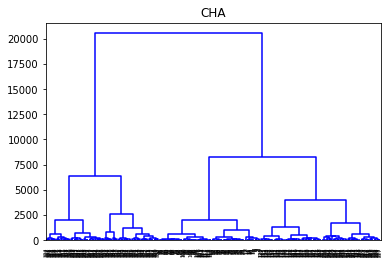

In [ ]:
#affichage du dendrogramme 
plt.title("CHA") 
dendrogram(Z,labels=V_SansLabels.index,orientation='top',color_threshold=0) 
plt.show()

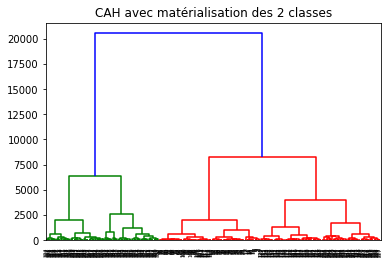

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
    Numero
1      392
1      295
1      296
1      297
1      298
..     ...
2      126
2      125
2      124
2      146
2      196

[392 rows x 1 columns]


In [ ]:
# matérialisation des deux classes (hauteur t = 17500) 
plt.title('CAH avec matérialisation des 2 classes') 
dendrogram(Z,labels=V_SansLabels.index,orientation='top',color_threshold=17500) 
plt.show()

#découpage à la hauteur t = 17500==> identifiants de 2 groupes obtenus 
groupes_cah = fcluster(Z,t=17500,criterion='distance') 
print(groupes_cah)

#index triés des groupes 
import numpy as np 
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
print(pandas.DataFrame(V_SansLabels.index[idg],groupes_cah[idg]))

In [ ]:
#correspondance les vrais labels avec les groupes de la CAH 
pandas.crosstab(V_Labels,groupes_cah)

col_0,1,2
origin,,
american,129,116
european,3,65
japanese,0,79
